# Subset Sum Equal To K

Moderate

![](https://files.codingninjas.in/yellow-spark-22969.svg)

72/80

Average time to solve is 30m

492 upvotes

Asked in companies

![Paytm (One97 Communications Limited)](https://files.codingninjas.in/e62c495df2288b8eea4aeb4e575e8552.webp)![Salesforce](https://files.codingninjas.in/company-short-logo-url/30/794e491c9f0a68dadad41b6d36f66945.png)![Atlassian](https://files.codingninjas.in/company-short-logo-url/1965/1494cfc4bcc82622e5c8db9b68366b76.jpeg)

## Problem statement

Send feedback

You are given an array/list ‘ARR’ of ‘N’ positive integers and an integer ‘K’. Your task is to check if there exists a subset in ‘ARR’ with a sum equal to ‘K’.

Note: Return true if there exists a subset with sum equal to ‘K’. Otherwise, return false.

For Example :

    If ‘ARR’ is {1,2,3,4} and ‘K’ = 4, then there exists 2 subsets with sum = 4. These are {1,3} and {4}. Hence, return true.
    

Detailed explanation ( Input/output format, Notes, Images )

Constraints:

    1 <= T <= 5
    1 <= N <= 10^3
    0 <= ARR[i] <= 10^9
    0 <= K <= 10^3
    
    Time Limit: 1 sec
    

Sample Input 1:

    2
    4 5
    4 3 2 1
    5 4
    2 5 1 6 7
    

Sample Output 1:

    true
    false
    

Explanation For Sample Input 1:

    In example 1, ‘ARR’ is {4,3,2,1} and ‘K’ = 5. There exist 2 subsets with sum = 5. These are {4,1} and {3,2}. Hence, return true.
    In example 2, ‘ARR’ is {2,5,1,6,7} and ‘K’ = 4. There are no subsets with sum = 4. Hence, return false.
    

Sample Input 2:

    2
    4 4
    6 1 2 1
    5 6
    1 7 2 9 10
    

Sample Output 2:

    true
    false
    

Explanation For Sample Input 2:

    In example 1, ‘ARR’ is {6,1,2,1} and ‘K’ = 4. There exist 1 subset with sum = 4. That is {1,2,1}. Hence, return true.
    In example 2, ‘ARR’ is {1,7,2,9,10} and ‘K’ = 6. There are no subsets with sum = 6. Hence, return false.
    

  

Hints:

    1. Can you find every possible subset of ‘ARR’ and check if its sum is equal to ‘K’?
    2. Can you use dynamic programming and use the previously calculated result to calculate the new result?
    3. Try to use a recursive approach followed by memoization by including both index and sum we can form.

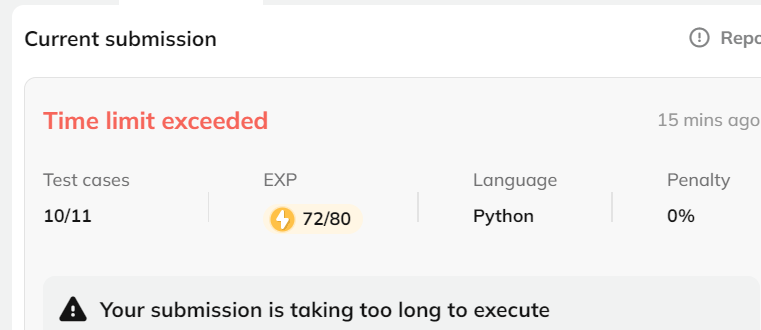

In [1]:
from os import *
from sys import *
from collections import *
from math import *

def subsetSumToK(n, k, arr):
    mid = len(arr)//2
    left = arr[:mid]
    right = arr[mid:]
    leftsums = get_subset_sum(left)
    rightsums = get_subset_sum(right)
    rightsums.sort()

    for sleft in leftsums:
        if sleft == k:
            return True

        if sleft > k:
            continue

        remaining = k - sleft
        idx = binary_search(rightsums, remaining)
        if idx != -1:
            return True
    return False


def get_subset_sum(arr):
    total_subsets = 1 << len(arr)

    sums = []
    for mask in range(total_subsets):
        sum_ = 0
        for i in range(len(arr)):
            if mask & (1 << i) != 0:
                sum_ += arr[i]
        
        sums.append(sum_)
    return sums


def binary_search(arr, target):
    low, high = 0 , len(arr) - 1

    while low <= high:
        mid = low + (high - low)//2

        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            high = mid - 1
        else:
            low = mid + 1

    return -1